In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
np.random.multivariate_normal?

In [24]:
arr = np.random.random((20, 20))

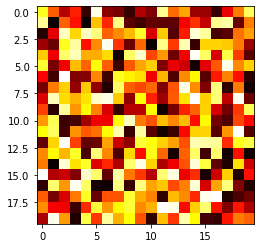

In [27]:
plt.imshow(arr, cmap = 'hot', interpolation='nearest');